# Final Project

Jungseo Lee (jungseo@umich.edu)

Suppose I am a marketer from an online grocery store. Find some interesting customer purchase behavior with provided data which will be helpful to future marketing campaigns and increase sales. This project was inspired by my previous work experience at Nielsen. I was a part of the Intelligence Analytics team at the Seoul office. The team is mainly focusing on sales of the shelf assortment optimization software. The software analyzes the point-of-sales data from various off-line sales points including big supermarket chains, convenience stores, etc. From this point, I could experience how data is used in the real world and would like to know the backbone of the software so that I can understand how it concludes which shelf assortment is better than the other. This project will be a good opportunity for me to learn how that software guides the users to optimize their sales by finding customer purchasing behavior. In that sense, I would like to focus on 
1) finding any interesting customer purchasing behavior including frequent purchasing items and order time by exploratory analysis. 
2) finding interesting combinations of items by basket analysis 
3) making a customer segmentation model based on user behavior including item purchased and purchasing frequency.

You can find data dictionary via the link below.
https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b

In [1]:
# import needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (20,10)
%matplotlib inline
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpmax, fpgrowth

## 1. Import Data

In [2]:
orders = pd.read_csv("instacart-market-basket-analysis/orders.csv")

In [3]:
order_products = pd.read_csv("instacart-market-basket-analysis/order_products__prior.csv")

In [4]:
products = pd.read_csv("instacart-market-basket-analysis/products.csv")

In [5]:
departments = pd.read_csv("instacart-market-basket-analysis/departments.csv")

In [6]:
aisles = pd.read_csv("instacart-market-basket-analysis/aisles.csv")

## 2. Exploratory Data Analysis (EDA)

In [7]:
orders.shape

(3421083, 7)

In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
order_products.shape

(32434489, 4)

In [10]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
products.shape

(49688, 4)

In [12]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
departments.shape

(21, 2)

In [14]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [15]:
aisles.shape

(134, 2)

In [16]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### 1) Customer purchasing behavior: frequent purchasing items, frequent order time

For getting frequent purchasing items and frequent order time information, I need to merge three different data frames: orders, order_products, and products.

In [17]:
ordered_products = pd.merge(orders, order_products, how='outer', on='order_id')

In [18]:
ordered_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0


In [19]:
ordered_products.shape

(32640698, 10)

In [20]:
ordered_products = pd.merge(ordered_products, products, how='left', on='product_id')

In [21]:
ordered_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0


In [22]:
ordered_products.shape

(32640698, 13)

In [23]:
ordered_products = pd.merge(ordered_products, departments, how='left', on='department_id')

In [24]:
ordered_products.shape

(32640698, 14)

In [25]:
# get only needed columns
frequently_purchased = ordered_products[['order_id','user_id','order_hour_of_day','product_id','product_name', 'department']]

In [26]:
frequently_purchased.head()

,order_id,user_id,order_hour_of_day,product_id,product_name,department
0,2539329,1,8,196.0,Soda,beverages
1,2539329,1,8,14084.0,Organic Unsweetened Vanilla Almond Milk,dairy eggs
2,2539329,1,8,12427.0,Original Beef Jerky,snacks
3,2539329,1,8,26088.0,Aged White Cheddar Popcorn,snacks
4,2539329,1,8,26405.0,XL Pick-A-Size Paper Towel Rolls,household


In [27]:
# count the orders by the order_hour_of_day
order_time = frequently_purchased.groupby('order_hour_of_day')['order_id'].count()

In [28]:
order_time.to_frame()

,order_id
order_hour_of_day,
0,220334
1,116588
2,69903
3,51675
4,53635
5,88659
6,292532
7,897149
8,1729853


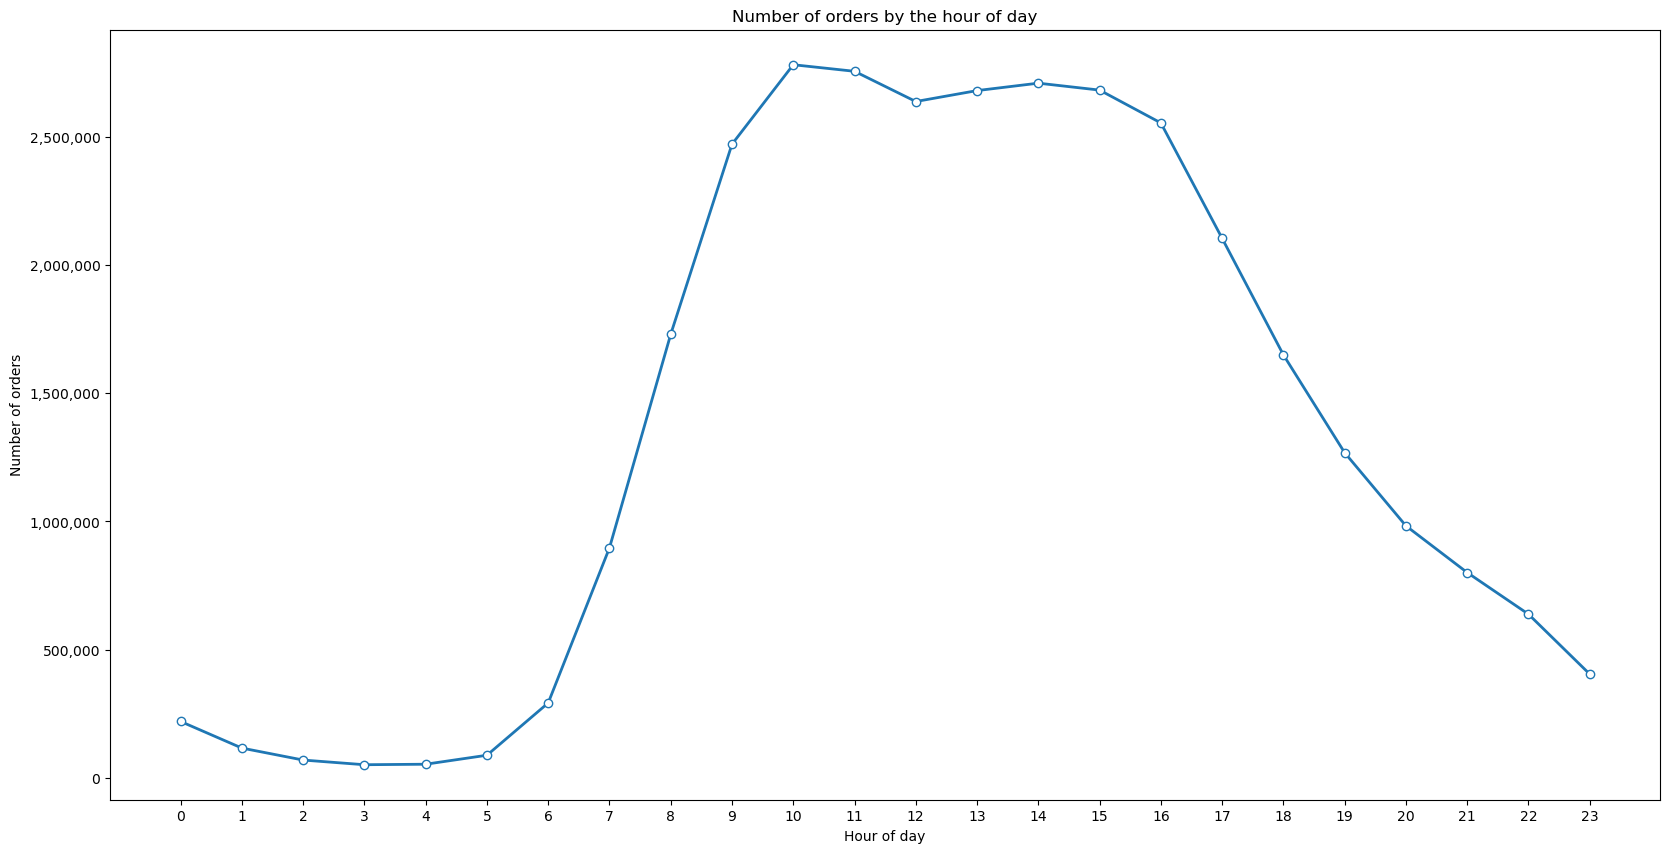

In [29]:
ax = order_time.plot(lw=2, title='Number of orders by the hour of day', marker='o', markerfacecolor='white')
ax.set_xlabel('Hour of day')
ax.set_ylabel('Number of orders')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

In [30]:
# Distribution of number of products per one order
num_product = frequently_purchased.groupby('order_id')['product_id'].count()

In [31]:
num_product.to_frame()

,product_id
order_id,
1,0
2,9
3,8
4,13
5,26
...,...
3421079,1
3421080,9
3421081,7


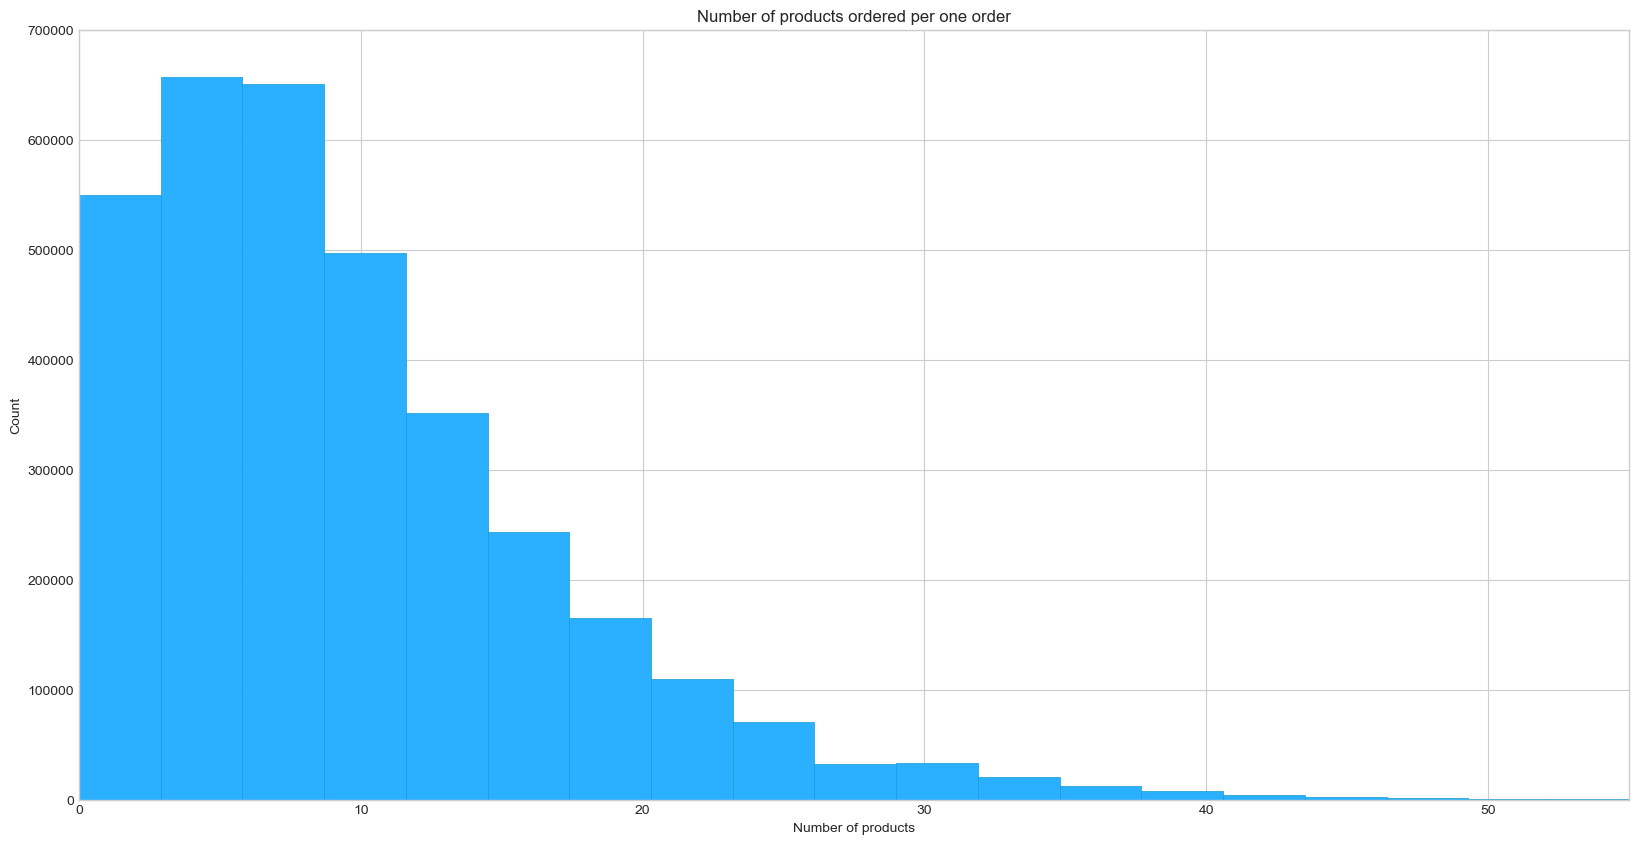

In [32]:
plt.style.use('seaborn-whitegrid')

plt.hist(num_product, bins=50, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.axis([0, 55, 0, 700000])
plt.title('Number of products ordered per one order') 
plt.xlabel('Number of products') 
plt.ylabel('Count') 
plt.show()

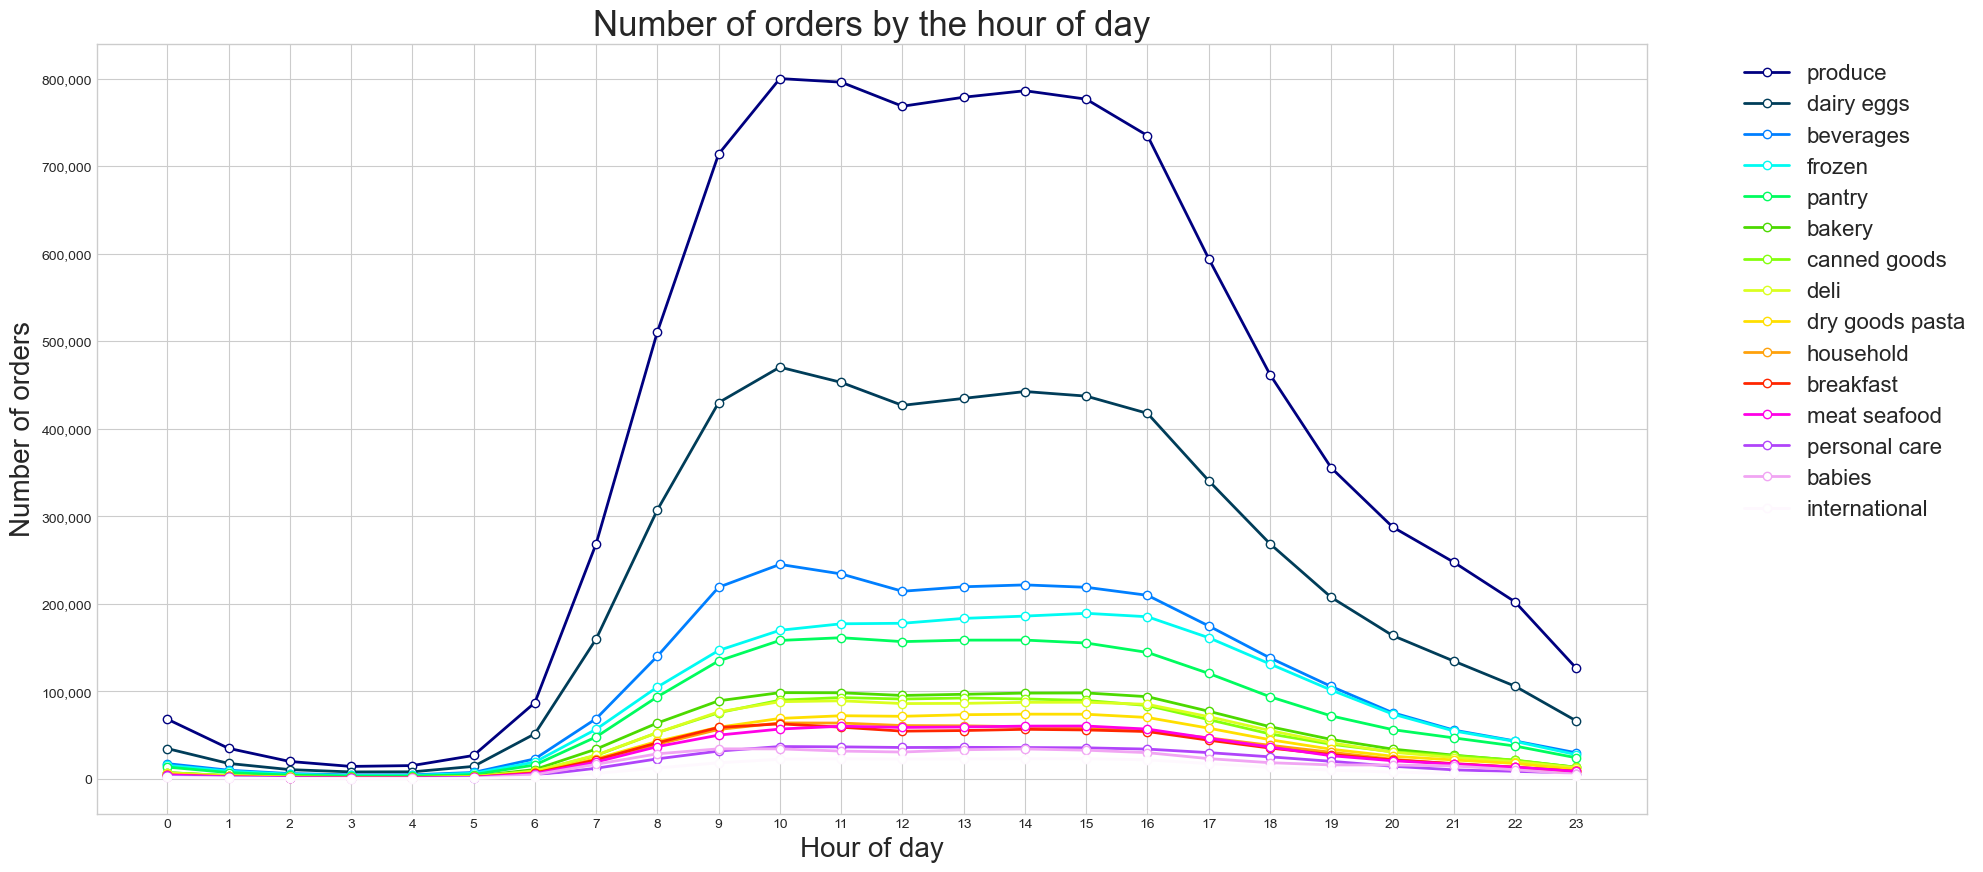

In [33]:
# Number of orders per each hour by each department
num_order_department = pd.pivot_table(frequently_purchased, index='order_hour_of_day', columns='department', values='order_id', aggfunc='count')
num_order_department.loc['total'] = num_order_department.iloc[:, :-1].sum()
num_order_department = num_order_department.transpose().sort_values(by=['total'], ascending=False).iloc[:15].transpose().iloc[:-1]
ax = num_order_department.plot(lw=2, marker='o', markerfacecolor='white')
ax.set_title('Number of orders by the hour of day', fontsize=25)
ax.set_xlabel('Hour of day', fontsize=20)
ax.set_ylabel('Number of orders', fontsize=20)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
colormap = plt.cm.gist_ncar
colors = [colormap(i) for i in np.linspace(0, 1, len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=16)

Based on the analysis above, I have found orders are mainly made between the day time (9 am to 4 pm). Most orders are made with 2-8 products per order. "Product, dairy eggs, beverages, frozen, pantry" are the top 5 departments that were ordered the most. You can find more details in the plots above.

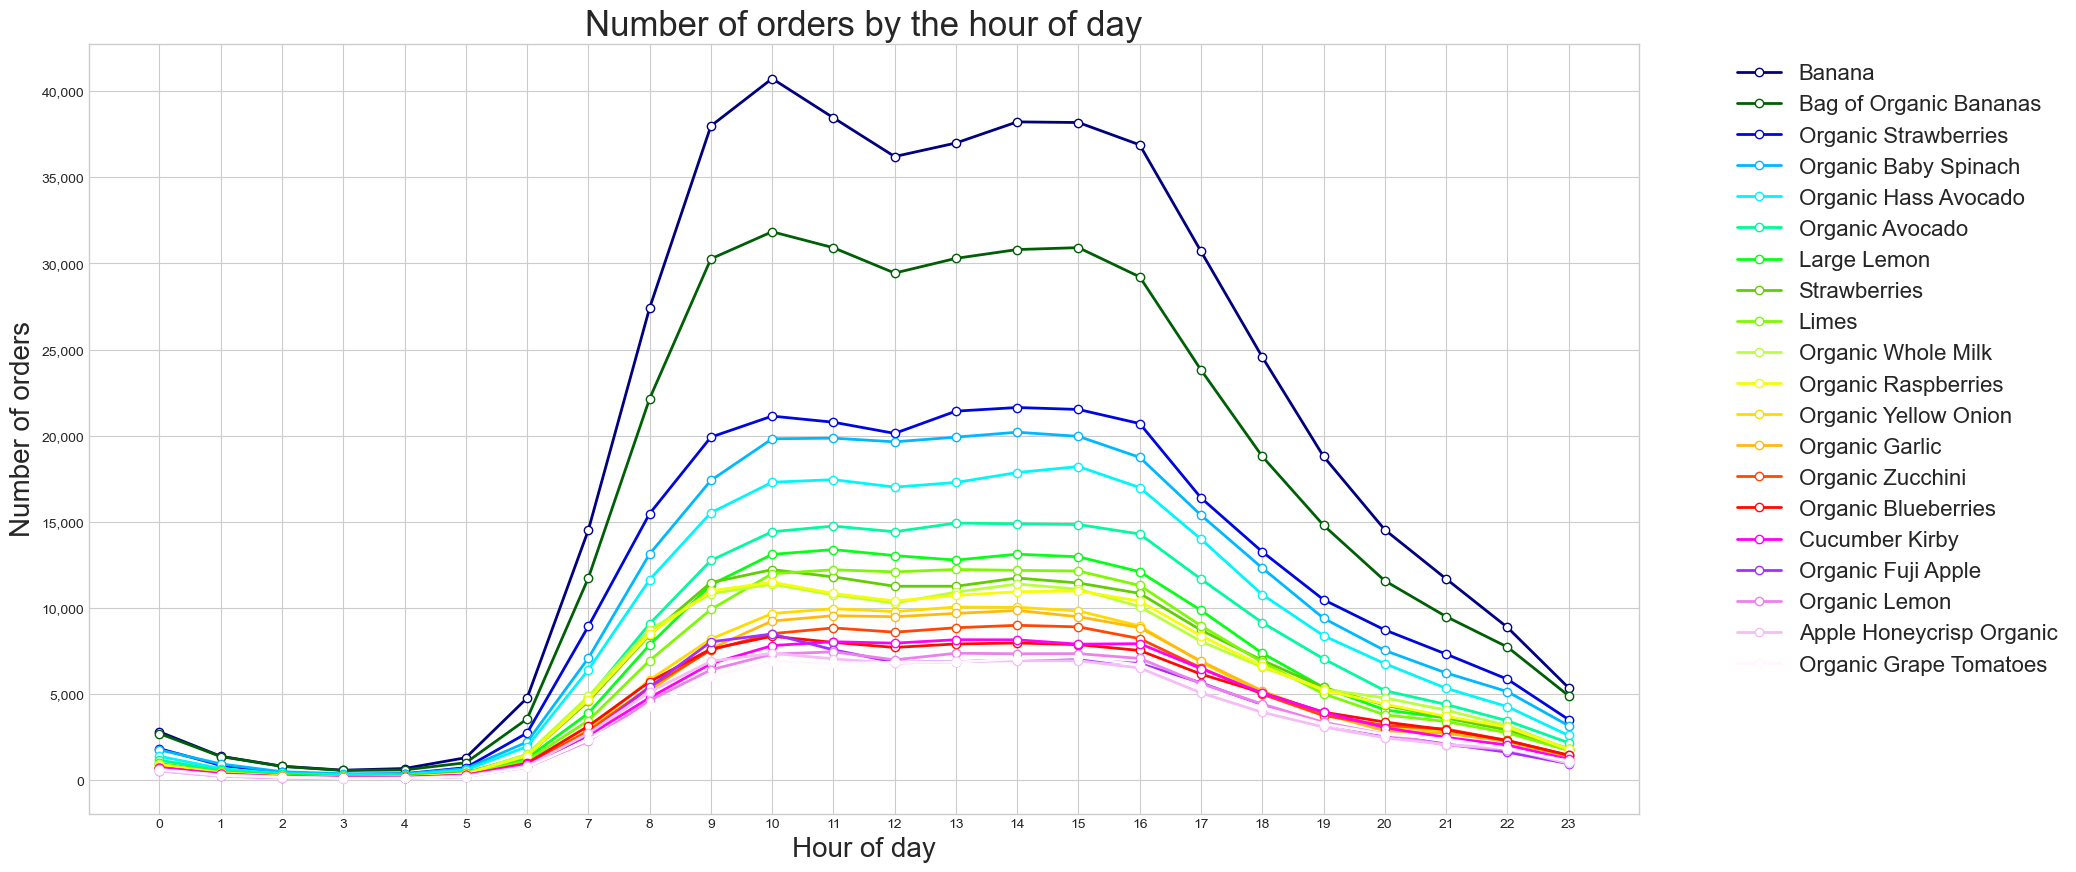

In [34]:
# Finding frequently purchased products
num_order_product = pd.pivot_table(frequently_purchased, index='order_hour_of_day', columns='product_name', values='order_id', aggfunc='count')
num_order_product.loc['total'] = num_order_product.iloc[:, :-1].sum()
num_order_product = num_order_product.transpose().sort_values(by=['total'], ascending=False).iloc[:20].transpose().iloc[:-1]
ax = num_order_product.plot(lw=2, marker='o', markerfacecolor='white')
ax.set_title('Number of orders by the hour of day', fontsize=25)
ax.set_xlabel('Hour of day', fontsize=20)
ax.set_ylabel('Number of orders', fontsize=20)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
colormap = plt.cm.gist_ncar
colors = [colormap(i) for i in np.linspace(0, 1, len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=16)

"Banana, Bag of Organic Bananas, Organic Strawberries, Organic Baby Spinach, Organic Hass Avoado" are the top 5 products that ordered the most.

### 2) Number of unique products, departments, users in the order data

In [35]:
frequently_purchased.head()

,order_id,user_id,order_hour_of_day,product_id,product_name,department
0,2539329,1,8,196.0,Soda,beverages
1,2539329,1,8,14084.0,Organic Unsweetened Vanilla Almond Milk,dairy eggs
2,2539329,1,8,12427.0,Original Beef Jerky,snacks
3,2539329,1,8,26088.0,Aged White Cheddar Popcorn,snacks
4,2539329,1,8,26405.0,XL Pick-A-Size Paper Towel Rolls,household


In [36]:
frequently_purchased.shape

(32640698, 6)

In [37]:
# number of unique products
frequently_purchased.product_id.nunique()

49677

In [38]:
# number of unique departments
frequently_purchased.department.nunique()

21

In [39]:
# number of unique users
frequently_purchased.user_id.nunique()

206209

## 3. Basket analysis

I would like to find the interesting combinations of the products through the basket analysis.

In [40]:
df = frequently_purchased

In [41]:
# Dealing with missing values
df.isna().sum()

order_id                  0
user_id                   0
order_hour_of_day         0
product_id           206209
product_name         206209
department           206209
dtype: int64

In [42]:
## As import infomrmation got missing, I will just drop the NaN values
df = df.dropna()

In [43]:
df.isna().sum()

order_id             0
user_id              0
order_hour_of_day    0
product_id           0
product_name         0
department           0
dtype: int64

In [44]:
df.shape

(32434489, 6)

In [45]:
# Change datatype of each column
convert_dict = {'order_id':int,
                'user_id':int,
                'order_hour_of_day':int,
                'product_id':int,
                'product_name':str,
                'department':str}
df = df.astype(convert_dict)
df.head()

,order_id,user_id,order_hour_of_day,product_id,product_name,department
0,2539329,1,8,196,Soda,beverages
1,2539329,1,8,14084,Organic Unsweetened Vanilla Almond Milk,dairy eggs
2,2539329,1,8,12427,Original Beef Jerky,snacks
3,2539329,1,8,26088,Aged White Cheddar Popcorn,snacks
4,2539329,1,8,26405,XL Pick-A-Size Paper Towel Rolls,household


### 1) Preparing the data for the Apriori Algorithm


Based on the hour of day, I would like to divide the order data into 3 different data categories: morning, daytime, evening.

In [46]:
df.head()

,order_id,user_id,order_hour_of_day,product_id,product_name,department
0,2539329,1,8,196,Soda,beverages
1,2539329,1,8,14084,Organic Unsweetened Vanilla Almond Milk,dairy eggs
2,2539329,1,8,12427,Original Beef Jerky,snacks
3,2539329,1,8,26088,Aged White Cheddar Popcorn,snacks
4,2539329,1,8,26405,XL Pick-A-Size Paper Towel Rolls,household


In [47]:
df_morning = df[(df.order_hour_of_day <= 7) & (df.order_hour_of_day >= 0)]
df_daytime = df[(df.order_hour_of_day <= 16) & (df.order_hour_of_day >= 8)]
df_evening = df[(df.order_hour_of_day <= 23) & (df.order_hour_of_day >= 17)]

In [48]:
# concatenate product_ids in one column based on the order_id
morning_product_sets = df_morning.groupby(['order_id'])['product_name'].transform(lambda x : ', '.join(x))
daytime_product_sets = df_daytime.groupby(['order_id'])['product_name'].transform(lambda x : ', '.join(x))
evening_product_sets = df_evening.groupby(['order_id'])['product_name'].transform(lambda x : ', '.join(x))

In [49]:
# drop duplicates 
morning_product_sets = morning_product_sets.drop_duplicates()
daytime_product_sets = daytime_product_sets.drop_duplicates()
evening_product_sets = evening_product_sets.drop_duplicates()

In [50]:
morning_product_sets = pd.DataFrame(morning_product_sets)
daytime_product_sets = pd.DataFrame(daytime_product_sets)
evening_product_sets = pd.DataFrame(evening_product_sets)

In [51]:
## save data in csv format
# morning_product_sets.to_csv('data/morning_product.csv')
# daytime_product_sets.to_csv('data/daytime_product.csv')
# evening_product_sets.to_csv('data/evening_product.csv')

## If you need to import data from files
# morning_product_sets = pd.read_csv('data/morning_product.csv')
# morning_product_sets.drop('Unnamed: 0',axis=1, inplace=True)
# daytime_product_sets = pd.read_csv('data/daytime_product.csv')
# daytime_product_sets.drop('Unnamed: 0',axis=1, inplace=True)
# evening_product_sets = pd.read_csv('data/evening_product.csv')
# evening_product_sets.drop('Unnamed: 0',axis=1, inplace=True)

In [52]:
morning_product_sets['unique_product'] = [set(i) for i in morning_product_sets.product_name.str.split(", ")]
daytime_product_sets['unique_product'] = [set(i) for i in daytime_product_sets.product_name.str.split(", ")]
evening_product_sets['unique_product'] = [set(i) for i in evening_product_sets.product_name.str.split(", ")]

In [53]:
# import needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (20,10)
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [54]:
morning_product_sets.head()

,product_name,unique_product
5,"Soda, Pistachios, Original Beef Jerky, Bag of ...","{Soda, Original Beef Jerky, Bag of Organic Ban..."
16,"Soda, Original Beef Jerky, Pistachios, Organic...","{Soda, XL Pick-A-Size Paper Towel Rolls, Origi..."
29,"Soda, Original Beef Jerky, Pistachios, Organic...","{Original Beef Jerky, Soda, Pistachios, Organi..."
512,"Organic Low Fat Chocolate Milk, Organic Jasmin...","{Organic Blueberries, Mexican Coffee, Seedless..."
624,"Organic Baby Spinach, Michigan Organic Kale, B...","{Low Sodium Beef Broth, Organic Dried Porcini ..."


In [55]:
morning_product_sets.iloc[0]['product_name']

'Soda, Pistachios, Original Beef Jerky, Bag of Organic Bananas, Aged White Cheddar Popcorn, Cinnamon Toast Crunch'

In [56]:
morning_product_sets.iloc[0]['unique_product']

{'Aged White Cheddar Popcorn',
 'Bag of Organic Bananas',
 'Cinnamon Toast Crunch',
 'Original Beef Jerky',
 'Pistachios',
 'Soda'}

Detailed that should be decided:

    1. Minimum support value
    2. How many itemsets

The main purpose of the project at the beginning was to find out the popular combinations of product purchasing. Therefore, it might be perfect to find out the popular 2-item sets that are bought together. This process will be useful if the company wants to build an algorithm of "frequently bought together" which pops up with a product recommendation when the customer puts the product into the cart.

Before we run the function that was created above to get the frequent k-item sets, we need to understand what each parameter is doing. 'k' is a parameter to decide the number of item sets. For example, if you set k to 3, it means that you want to see all the 3-item sets (combinations with 3 different products) that occur more than a fraction of 'min_support' times. 'min_support' refers to the fraction of transactions which contain all the items in the itemset. If the 'min_support' is set to 0.05, it means the fraction of transactions with a probability of items occurring together as compared to the total number of transactions is 5 out of 100.

In [57]:
morning_product_sets.shape

(167758, 2)

I am going to randomly sample 10,000 rows from each category as there are too many data.

In [58]:
df_morning = morning_product_sets.sample(n=10000)
df_daytime = daytime_product_sets.sample(n=10000)
df_evening = evening_product_sets.sample(n=10000)

In [59]:
df_morning.shape

(10000, 2)

In [60]:
## Making database based on the mlb funciton
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
morning_matrix = pd.DataFrame(mlb.fit_transform(df_morning['unique_product']), columns=mlb.classes_)   # transform dataframe to a matrix where each row represents an itemset and each column represents an item
morning_database = mlb.inverse_transform(mlb.fit_transform(df_morning['unique_product']))

In [61]:
morning_matrix

,Apricot & Banana Stage 2 Baby Food,Free and Clear,#2 Coffee Filters,#4 Natural Brown Coffee Filters,& Baby Wipes,& Cheese Biscuit,& Cheese English Muffin,& Cheese Sandwiches,& Cheese Sauce,& Cheese Scramble,...,with Key-Lock Closures,with Magnesium,with Natural Pulp,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Pulp,with Spinach,with Vanilla Beans,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
mlb = MultiLabelBinarizer()
daytime_matrix = pd.DataFrame(mlb.fit_transform(df_daytime['unique_product']), columns=mlb.classes_)   # transform dataframe to a matrix where each row represents an itemset and each column represents an item
daytime_database = mlb.inverse_transform(mlb.fit_transform(df_daytime['unique_product']))

In [63]:
mlb = MultiLabelBinarizer()
evening_matrix = pd.DataFrame(mlb.fit_transform(df_evening['unique_product']), columns=mlb.classes_)   # transform dataframe to a matrix where each row represents an itemset and each column represents an item
evening_database = mlb.inverse_transform(mlb.fit_transform(df_evening['unique_product']))

### 2) Applying the Apriori Algorithm

In [64]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.preprocessing import TransactionEncoder


def frequent_itemsets (database, min_support=0.005):
    te = TransactionEncoder()
    te_ary = te.fit(database).transform(database)      
    df = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
    return frequent_itemsets

In [65]:
morning_fi = frequent_itemsets(morning_database)
daytime_fi = frequent_itemsets(daytime_database)
evening_fi = frequent_itemsets(evening_database)

In [66]:
morning_fi

,support,itemsets
0,0.1304,(Bag of Organic Bananas)
1,0.0970,(Organic Strawberries)
2,0.0824,(Organic Baby Spinach)
3,0.0518,(Organic Whole Milk)
4,0.0331,(Organic Zucchini)
...,...,...
421,0.0063,"(Banana, Blueberries)"
422,0.0060,"(Limes, Organic Cilantro)"
423,0.0052,"(Bag of Organic Bananas, Organic Cilantro)"
424,0.0063,"(Banana, Organic Blackberries)"


In [67]:
daytime_fi

,support,itemsets
0,0.0052,(Macaroni & Cheese)
1,0.0111,(Pure Irish Butter)
2,0.0065,(Unsalted Pure Irish Butter)
3,0.0166,(Extra Virgin Olive Oil)
4,0.1532,(Banana)
...,...,...
403,0.0056,"(Banana, Organic Gala Apples)"
404,0.0051,"(Bag of Organic Bananas, Organic Gala Apples)"
405,0.0050,"(Organic Unsweetened Almond Milk, Bag of Organ..."
406,0.0056,"(Banana, Red Peppers)"


In [68]:
evening_fi

,support,itemsets
0,0.0247,(Honeycrisp Apple)
1,0.0242,(Apple Honeycrisp Organic)
2,0.0179,(Clementines)
3,0.0151,(Bag)
4,0.0075,(Organic Bosc Pear)
...,...,...
358,0.0053,"(Organic Strawberries, Organic Large Extra Fan..."
359,0.0079,"(Bag of Organic Bananas, Organic Large Extra F..."
360,0.0096,"(Banana, Organic Fuji Apple)"
361,0.0050,"(YoKids Squeezers Organic Low-Fat Yogurt, Stra..."


As we can see above, there are some differences between frequent itemsets based on when the order was made. We got nearly 400 itemsets that support bigger than 0.005(0.5%) per category. Now I would like to find out the interesting combinations of items from the frequent itemsets.

### 3) Find out the interesting combinations

In [69]:
# add mutual information
def mi(antecedent_support, consequent_support, support):

    mutual_information = 0
    # (x=1, y=1)
    mi1 = support * np.log2(support/(antecedent_support*consequent_support))
    mutual_information += mi1
    
    # (x=1, y=0)
    mi2 = (antecedent_support-support) * np.log2((antecedent_support-support)/(antecedent_support*(1-consequent_support)))
    mutual_information += mi2
    
    # (x=0, y=1)
    mi3 = (consequent_support-support) * np.log2 ((consequent_support-support)/((1-antecedent_support)*(consequent_support)))
    mutual_information += mi3
    
    # (x=0, y=0)
    mi4 = (1 + support - antecedent_support - consequent_support) * np.log2((1 + support - antecedent_support - consequent_support)/((1-antecedent_support)*(1-consequent_support)))
    mutual_information += mi4
    
    return mutual_information

def add_mi_info(x):
    antecedent_support = x['antecedent support']
    consequent_support = x['consequent support']
    support = x['support']
    return mi(antecedent_support, consequent_support, support)

To decide which metric to use to evaluate the association rules and select the thresholds, please find the information below.
http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

* support: Typically, support is used to measure the abundance or frequency (often interpreted as significance or importance) of an itemset in a database. We refer to an itemset as a "frequent itemset" if your support larger than a specified minimum-support threshold. [0,1]

            - 'antecedent support': the proportion of transactions that contain the antecedent
            - 'consequent support': the proportion of transactions that contain the consequent
            - 'support': the proportion of transactions that contain the combined itemset (antecedents or consequents)
            
* confidence: The probability of seeing the consequent in a transaction given that it also contains the antecedent. (maximal: 1) [0, 1]

* lift: Commonly used to measure how much more often the antecedent and consequent occur together than we would expect if they were statistically independent. (If antecedent and consequent are independent, the Lift score will be exactly 1.) [0, inf]

* leverage: The difference between the observed frequency of antecedent and consequent appearing together and the frequency that would be expected if antecedent and consequent were independent. (0 indicates independence.) [-1, 1]

* conviction: high conviction value means that the consequent is highly depending on the antecedent. [0, inf]

In [70]:
morning_ar_matrix = association_rules(morning_fi, metric='lift', min_threshold=5)
morning_ar_matrix 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Organic Garlic),(Organic Yellow Onion),0.0322,0.0337,0.0057,0.177019,5.252778,0.004615,1.174146
1,(Organic Yellow Onion),(Organic Garlic),0.0337,0.0322,0.0057,0.169139,5.252778,0.004615,1.164816
2,(Clementines),(Bag),0.0221,0.0166,0.0142,0.642534,38.706864,0.013833,2.751030
3,(Bag),(Clementines),0.0166,0.0221,0.0142,0.855422,38.706864,0.013833,6.763808
4,(Milk),(Organic),0.0135,0.0233,0.0080,0.592593,25.433158,0.007685,2.397355
5,(Organic),(Milk),0.0233,0.0135,0.0080,0.343348,25.433158,0.007685,1.502317
6,(Milk),(Vitamin D),0.0135,0.0094,0.0094,0.696296,74.074074,0.009273,3.261732
7,(Vitamin D),(Milk),0.0094,0.0135,0.0094,1.000000,74.074074,0.009273,inf
8,(Vitamin D),(Organic),0.0094,0.0233,0.0069,0.734043,31.503972,0.006681,3.672392
9,(Organic),(Vitamin D),0.0233,0.0094,0.0069,0.296137,31.503972,0.006681,1.407377


In [71]:
daytime_ar_matrix = association_rules(daytime_fi, metric='lift', min_threshold=5)
daytime_ar_matrix

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Clementines),(Bag),0.0239,0.0158,0.0136,0.569038,36.015042,0.013222,2.283726
1,(Bag),(Clementines),0.0158,0.0239,0.0136,0.860759,36.015042,0.013222,7.010173
2,(Milk),(Organic),0.0135,0.0245,0.0073,0.540741,22.071051,0.006969,2.124073
3,(Organic),(Milk),0.0245,0.0135,0.0073,0.297959,22.071051,0.006969,1.405189
4,(Milk),(Vitamin D),0.0135,0.0080,0.0077,0.570370,71.296296,0.007592,2.308966
5,(Vitamin D),(Milk),0.0080,0.0135,0.0077,0.962500,71.296296,0.007592,26.306667
6,(Vitamin D),(Organic),0.0080,0.0245,0.0058,0.725000,29.591837,0.005604,3.547273
7,(Organic),(Vitamin D),0.0245,0.0080,0.0058,0.236735,29.591837,0.005604,1.299679
8,"(Milk, Vitamin D)",(Organic),0.0077,0.0245,0.0058,0.753247,30.744765,0.005611,3.953342
9,"(Milk, Organic)",(Vitamin D),0.0073,0.0080,0.0058,0.794521,99.315068,0.005742,4.827733


In [72]:
evening_ar_matrix = association_rules(evening_fi, metric='lift', min_threshold=5)
evening_ar_matrix

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Clementines),(Bag),0.0179,0.0151,0.0132,0.737430,48.836435,0.012930,3.751002
1,(Bag),(Clementines),0.0151,0.0179,0.0132,0.874172,48.836435,0.012930,7.805111
2,(Organic Yellow Onion),(Organic Garlic),0.0335,0.0357,0.0067,0.200000,5.602241,0.005504,1.205375
3,(Organic Garlic),(Organic Yellow Onion),0.0357,0.0335,0.0067,0.187675,5.602241,0.005504,1.189795
4,(Milk),(Organic),0.0129,0.0220,0.0070,0.542636,24.665257,0.006716,2.138339
5,(Organic),(Milk),0.0220,0.0129,0.0070,0.318182,24.665257,0.006716,1.447747
6,(Milk),(Vitamin D),0.0129,0.0090,0.0087,0.674419,74.935401,0.008584,3.043786
7,(Vitamin D),(Milk),0.0090,0.0129,0.0087,0.966667,74.935401,0.008584,29.613000
8,(Vitamin D),(Organic),0.0090,0.0220,0.0060,0.666667,30.303030,0.005802,2.934000
9,(Organic),(Vitamin D),0.0220,0.0090,0.0060,0.272727,30.303030,0.005802,1.362625


I would like to add mutual information column with calculating mutual information uses the three support values 1) antecedent support 2) consequent support and 3) support to measure of dependence between two variables.

In [73]:
morning_ar_matrix['mutual information'] = morning_ar_matrix.apply(lambda x:add_mi_info(x), axis=1)
morning_ar_matrix

/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:14: RuntimeWarning: divide by zero encountered in log2
  mi3 = (consequent_support-support) * np.log2 ((consequent_support-support)/((1-antecedent_support)*(consequent_support)))
/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:14: RuntimeWarning: invalid value encountered in double_scalars
  mi3 = (consequent_support-support) * np.log2 ((consequent_support-support)/((1-antecedent_support)*(consequent_support)))
/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:10: RuntimeWarning: divide by zero encountered in log2
  mi2 = (antecedent_support-support) * np.log2((antecedent_support-support)/(antecedent_support*(1-consequent_support)))
/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:10: RuntimeWarning: invalid value encountered in double_scalars
  mi2 = (antecedent_support-support) * np.log2((antecedent_support-support)/(ante

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,mutual information
0,(Organic Garlic),(Organic Yellow Onion),0.0322,0.0337,0.0057,0.177019,5.252778,0.004615,1.174146,0.008014
1,(Organic Yellow Onion),(Organic Garlic),0.0337,0.0322,0.0057,0.169139,5.252778,0.004615,1.164816,0.008014
2,(Clementines),(Bag),0.0221,0.0166,0.0142,0.642534,38.706864,0.013833,2.751030,0.076845
3,(Bag),(Clementines),0.0166,0.0221,0.0142,0.855422,38.706864,0.013833,6.763808,0.076845
4,(Milk),(Organic),0.0135,0.0233,0.0080,0.592593,25.433158,0.007685,2.397355,0.032559
5,(Organic),(Milk),0.0233,0.0135,0.0080,0.343348,25.433158,0.007685,1.502317,0.032559
6,(Milk),(Vitamin D),0.0135,0.0094,0.0094,0.696296,74.074074,0.009273,3.261732,NaN
7,(Vitamin D),(Milk),0.0094,0.0135,0.0094,1.000000,74.074074,0.009273,inf,NaN
8,(Vitamin D),(Organic),0.0094,0.0233,0.0069,0.734043,31.503972,0.006681,3.672392,0.031239
9,(Organic),(Vitamin D),0.0233,0.0094,0.0069,0.296137,31.503972,0.006681,1.407377,0.031239


In [74]:
daytime_ar_matrix['mutual information'] = daytime_ar_matrix.apply(lambda x:add_mi_info(x), axis=1)
daytime_ar_matrix

/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:10: RuntimeWarning: divide by zero encountered in log2
  mi2 = (antecedent_support-support) * np.log2((antecedent_support-support)/(antecedent_support*(1-consequent_support)))
/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:10: RuntimeWarning: invalid value encountered in double_scalars
  mi2 = (antecedent_support-support) * np.log2((antecedent_support-support)/(antecedent_support*(1-consequent_support)))
/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:14: RuntimeWarning: divide by zero encountered in log2
  mi3 = (consequent_support-support) * np.log2 ((consequent_support-support)/((1-antecedent_support)*(consequent_support)))
/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:14: RuntimeWarning: invalid value encountered in double_scalars
  mi3 = (consequent_support-support) * np.log2 ((consequent_support-support)/((1-ant

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,mutual information
0,(Clementines),(Bag),0.0239,0.0158,0.0136,0.569038,36.015042,0.013222,2.283726,0.071074
1,(Bag),(Clementines),0.0158,0.0239,0.0136,0.860759,36.015042,0.013222,7.010173,0.071074
2,(Milk),(Organic),0.0135,0.0245,0.0073,0.540741,22.071051,0.006969,2.124073,0.027499
3,(Organic),(Milk),0.0245,0.0135,0.0073,0.297959,22.071051,0.006969,1.405189,0.027499
4,(Milk),(Vitamin D),0.0135,0.0080,0.0077,0.570370,71.296296,0.007592,2.308966,0.049977
5,(Vitamin D),(Milk),0.0080,0.0135,0.0077,0.962500,71.296296,0.007592,26.306667,0.049977
6,(Vitamin D),(Organic),0.0080,0.0245,0.0058,0.725000,29.591837,0.005604,3.547273,0.025363
7,(Organic),(Vitamin D),0.0245,0.0080,0.0058,0.236735,29.591837,0.005604,1.299679,0.025363
8,"(Milk, Vitamin D)",(Organic),0.0077,0.0245,0.0058,0.753247,30.744765,0.005611,3.953342,0.025937
9,"(Milk, Organic)",(Vitamin D),0.0073,0.0080,0.0058,0.794521,99.315068,0.005742,4.827733,0.039303


In [75]:
evening_ar_matrix['mutual information'] = evening_ar_matrix.apply(lambda x:add_mi_info(x), axis=1)
evening_ar_matrix

/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:10: RuntimeWarning: divide by zero encountered in log2
  mi2 = (antecedent_support-support) * np.log2((antecedent_support-support)/(antecedent_support*(1-consequent_support)))
/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:10: RuntimeWarning: invalid value encountered in double_scalars
  mi2 = (antecedent_support-support) * np.log2((antecedent_support-support)/(antecedent_support*(1-consequent_support)))
/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:14: RuntimeWarning: divide by zero encountered in log2
  mi3 = (consequent_support-support) * np.log2 ((consequent_support-support)/((1-antecedent_support)*(consequent_support)))
/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1248/3036449379.py:14: RuntimeWarning: invalid value encountered in double_scalars
  mi3 = (consequent_support-support) * np.log2 ((consequent_support-support)/((1-ant

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,mutual information
0,(Clementines),(Bag),0.0179,0.0151,0.0132,0.737430,48.836435,0.012930,3.751002,0.078232
1,(Bag),(Clementines),0.0151,0.0179,0.0132,0.874172,48.836435,0.012930,7.805111,0.078232
2,(Organic Yellow Onion),(Organic Garlic),0.0335,0.0357,0.0067,0.200000,5.602241,0.005504,1.205375,0.010128
3,(Organic Garlic),(Organic Yellow Onion),0.0357,0.0335,0.0067,0.187675,5.602241,0.005504,1.189795,0.010128
4,(Milk),(Organic),0.0129,0.0220,0.0070,0.542636,24.665257,0.006716,2.138339,0.027617
5,(Organic),(Milk),0.0220,0.0129,0.0070,0.318182,24.665257,0.006716,1.447747,0.027617
6,(Milk),(Vitamin D),0.0129,0.0090,0.0087,0.674419,74.935401,0.008584,3.043786,0.058407
7,(Vitamin D),(Milk),0.0090,0.0129,0.0087,0.966667,74.935401,0.008584,29.613000,0.058407
8,(Vitamin D),(Organic),0.0090,0.0220,0.0060,0.666667,30.303030,0.005802,2.934000,0.026123
9,(Organic),(Vitamin D),0.0220,0.0090,0.0060,0.272727,30.303030,0.005802,1.362625,0.026123


In [76]:
morning_ar_matrix[morning_ar_matrix['mutual information'] > 0.05]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,mutual information
2,(Clementines),(Bag),0.0221,0.0166,0.0142,0.642534,38.706864,0.013833,2.751030,0.076845
3,(Bag),(Clementines),0.0166,0.0221,0.0142,0.855422,38.706864,0.013833,6.763808,0.076845


In [77]:
daytime_ar_matrix[daytime_ar_matrix['mutual information'] > 0.05]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,mutual information
0,(Clementines),(Bag),0.0239,0.0158,0.0136,0.569038,36.015042,0.013222,2.283726,0.071074
1,(Bag),(Clementines),0.0158,0.0239,0.0136,0.860759,36.015042,0.013222,7.010173,0.071074


In [78]:
evening_ar_matrix[evening_ar_matrix['mutual information'] > 0.05]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,mutual information
0,(Clementines),(Bag),0.0179,0.0151,0.0132,0.737430,48.836435,0.012930,3.751002,0.078232
1,(Bag),(Clementines),0.0151,0.0179,0.0132,0.874172,48.836435,0.012930,7.805111,0.078232
6,(Milk),(Vitamin D),0.0129,0.0090,0.0087,0.674419,74.935401,0.008584,3.043786,0.058407
7,(Vitamin D),(Milk),0.0090,0.0129,0.0087,0.966667,74.935401,0.008584,29.613000,0.058407



Based on the analysis above, I could conclude that the frequent itemsets that are commonly purchased together are not too different based on when the order was made. Also, the process led me to find out a few interesting product combinations that I would never think of. For example, vitamin D and milk show high dependency.

## 4. Customer segmentation anlaysis

There are too many different users in the dataset. In the second part of the data mining work, I would like to segmentize the users (customers of Instacart) by their order behaviors. This work could be beneficial to the company especially when the company wants to build future business strategies for its customers.

In [79]:
frequently_purchased.head()

,order_id,user_id,order_hour_of_day,product_id,product_name,department
0,2539329,1,8,196.0,Soda,beverages
1,2539329,1,8,14084.0,Organic Unsweetened Vanilla Almond Milk,dairy eggs
2,2539329,1,8,12427.0,Original Beef Jerky,snacks
3,2539329,1,8,26088.0,Aged White Cheddar Popcorn,snacks
4,2539329,1,8,26405.0,XL Pick-A-Size Paper Towel Rolls,household


In [80]:
frequently_purchased.user_id.nunique()

206209

In [81]:
print(f'There are a total of {frequently_purchased.user_id.nunique()} users in the dataset.')

There are a total of 206209 users in the dataset.


### 1) Preparing the dataset

For segmentizing the customers into groups, we need to have data that has features regarding each customer. In the datasets we have right now, there are a lot of different levels of product categories including product, aisle, and department. As we have too many different products, it might not be useful to utilize the product itself by each customer. I would like to build a dataset that shows the number of orders that each customer made from each aisle which might be relevant as it is one level higher category than the product. Furthermore, I would like to add one more feature, the avg_days_since_prior_order of the customer which is calculated by the 'days_since_prior_order' in the 'orders' dataset.

In [82]:
df = pd.merge(frequently_purchased, products, how='left', on='product_id')

In [83]:
df = pd.merge(df, aisles, how='left', on='aisle_id')

In [84]:
df = pd.merge(df, orders, how='left', on='order_id')

In [85]:
df.head()

,order_id,user_id_x,order_hour_of_day_x,product_id,product_name_x,department,product_name_y,aisle_id,department_id,aisle,user_id_y,eval_set,order_number,order_dow,order_hour_of_day_y,days_since_prior_order
0,2539329,1,8,196.0,Soda,beverages,Soda,77.0,7.0,soft drinks,1,prior,1,2,8,NaN
1,2539329,1,8,14084.0,Organic Unsweetened Vanilla Almond Milk,dairy eggs,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,soy lactosefree,1,prior,1,2,8,NaN
2,2539329,1,8,12427.0,Original Beef Jerky,snacks,Original Beef Jerky,23.0,19.0,popcorn jerky,1,prior,1,2,8,NaN
3,2539329,1,8,26088.0,Aged White Cheddar Popcorn,snacks,Aged White Cheddar Popcorn,23.0,19.0,popcorn jerky,1,prior,1,2,8,NaN
4,2539329,1,8,26405.0,XL Pick-A-Size Paper Towel Rolls,household,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,paper goods,1,prior,1,2,8,NaN


In [86]:
df.columns

Index(['order_id', 'user_id_x', 'order_hour_of_day_x', 'product_id',
       'product_name_x', 'department', 'product_name_y', 'aisle_id',
       'department_id', 'aisle', 'user_id_y', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day_y', 'days_since_prior_order'],
      dtype='object')

In [87]:
# add average days_since_prior_order
df = df[['order_id', 'user_id_x', 'order_hour_of_day_x', 'product_id', 'department', 'aisle_id',
       'department_id', 'aisle', 'order_number','days_since_prior_order']]

In [88]:
df.head()

,order_id,user_id_x,order_hour_of_day_x,product_id,department,aisle_id,department_id,aisle,order_number,days_since_prior_order
0,2539329,1,8,196.0,beverages,77.0,7.0,soft drinks,1,NaN
1,2539329,1,8,14084.0,dairy eggs,91.0,16.0,soy lactosefree,1,NaN
2,2539329,1,8,12427.0,snacks,23.0,19.0,popcorn jerky,1,NaN
3,2539329,1,8,26088.0,snacks,23.0,19.0,popcorn jerky,1,NaN
4,2539329,1,8,26405.0,household,54.0,17.0,paper goods,1,NaN


In [89]:
# first fill NaN values as 0
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)

In [90]:
df.head()

,order_id,user_id_x,order_hour_of_day_x,product_id,department,aisle_id,department_id,aisle,order_number,days_since_prior_order
0,2539329,1,8,196.0,beverages,77.0,7.0,soft drinks,1,0.0
1,2539329,1,8,14084.0,dairy eggs,91.0,16.0,soy lactosefree,1,0.0
2,2539329,1,8,12427.0,snacks,23.0,19.0,popcorn jerky,1,0.0
3,2539329,1,8,26088.0,snacks,23.0,19.0,popcorn jerky,1,0.0
4,2539329,1,8,26405.0,household,54.0,17.0,paper goods,1,0.0


In [91]:
df['avg_days_since_prior_order'] = df.groupby(['user_id_x'])['days_since_prior_order'].transform(np.mean)

In [92]:
df.columns = ['order_id', 'user_id', 'order_hour_of_day', 'product_id',
       'department', 'aisle_id', 'department_id', 'aisle', 'order_number',
       'days_since_prior_order', 'avg_days_since_prior_order']

In [93]:
df.head()

,order_id,user_id,order_hour_of_day,product_id,department,aisle_id,department_id,aisle,order_number,days_since_prior_order,avg_days_since_prior_order
0,2539329,1,8,196.0,beverages,77.0,7.0,soft drinks,1,0.0,18.466667
1,2539329,1,8,14084.0,dairy eggs,91.0,16.0,soy lactosefree,1,0.0,18.466667
2,2539329,1,8,12427.0,snacks,23.0,19.0,popcorn jerky,1,0.0,18.466667
3,2539329,1,8,26088.0,snacks,23.0,19.0,popcorn jerky,1,0.0,18.466667
4,2539329,1,8,26405.0,household,54.0,17.0,paper goods,1,0.0,18.466667


In [94]:
df = df[['order_id', 'user_id', 'aisle', 'avg_days_since_prior_order' ]]

In [95]:
df.head()

,order_id,user_id,aisle,avg_days_since_prior_order
0,2539329,1,soft drinks,18.466667
1,2539329,1,soy lactosefree,18.466667
2,2539329,1,popcorn jerky,18.466667
3,2539329,1,popcorn jerky,18.466667
4,2539329,1,paper goods,18.466667


In [96]:
df.user_id.nunique()

206209

In [97]:
df.aisle.nunique()

134

In [98]:
new_df = pd.crosstab(df['user_id'], df['aisle'])

In [126]:
new_df

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
206206,0,4,0,0,0,0,4,1,0,0,...,1,0,0,0,0,1,0,1,0,0
206207,0,0,0,0,1,0,0,0,0,0,...,3,4,0,2,1,0,0,11,0,15


In [107]:
df_a = df.drop_duplicates(subset='user_id', keep='first')

In [108]:
df_a = df_a.set_index('user_id')

In [110]:
df_a = df_a[['avg_days_since_prior_order']]

In [111]:
df_a

,avg_days_since_prior_order
user_id,
1,18.466667
2,14.979592
3,10.191011
4,12.894737
5,10.078947
...,...
206205,9.696970
206206,3.972028
206207,13.281250


In [113]:
a = pd.merge(new_df, df_a, how = 'left', left_on=new_df.index, right_on=df_a.index)

In [116]:
a.drop('key_0', axis=1, inplace=True)

In [117]:
a

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,avg_days_since_prior_order
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,18.466667
1,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,14.979592
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,10.191011
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,12.894737
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,10.078947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,9.696970
206205,0,4,0,0,0,0,4,1,0,0,...,0,0,0,0,1,0,1,0,0,3.972028
206206,0,0,0,0,1,0,0,0,0,0,...,4,0,2,1,0,0,11,0,15,13.281250
206207,0,3,0,0,3,0,4,0,0,0,...,0,0,7,0,0,0,0,0,33,7.305310


This matrix coming to the end that is not used for the algorithm. This is because the values in the column, avg_days_since_prior_order, are way too bigger than values from other columns. I would like to stick with the original crosstab table, new_df.

In [118]:
df = new_df

### 2) Applying K-Means algorithm

In [102]:
from sklearn.cluster import KMeans

#### Using Elbow method to decide K value

With this method, I would like to visualize WCSS (Within-Cluster Sum of Square): the sum of the square distance between points in a cluster and the cluster centroid to find out the best K values.

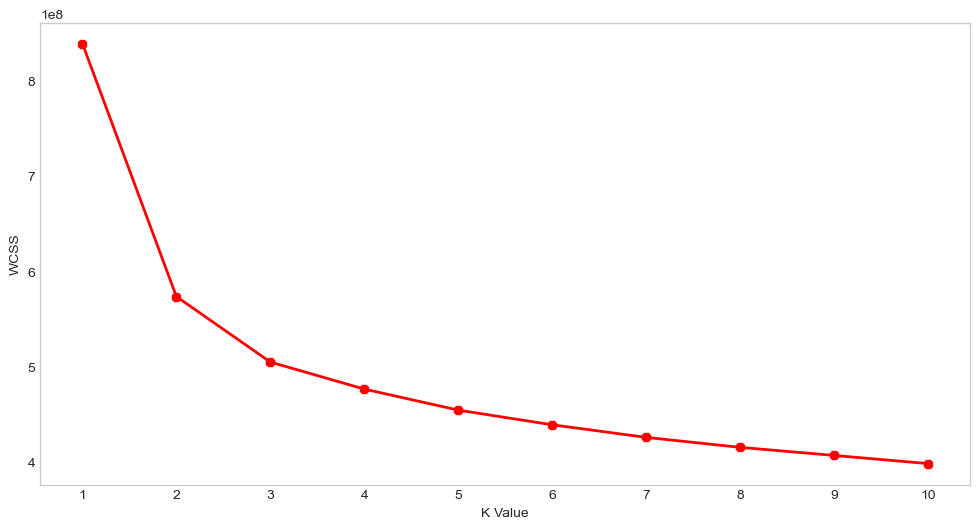

In [119]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

The elow shape created is 3 meaning that the optimal number of clusters is 3. The graph starts to move almost parallel to the X-axis from 3. This indicates that there is not much benefit to making more clusters as the decreasing proportion of the sum of squares is not as large as making fewer clusters'.

#### Reduce the dimensionality

The data matrix we have which will be used for the clustering is very sparse. Most of the columns among 134 features have values of 0. It is very unlikely that clustering algorithms like K-Means work well on high-dimensional data. Therefore, I would like to go through the dimension reduction process first.

In [120]:
from sklearn.decomposition import TruncatedSVD

In [121]:
# Reduced to 3 components
svd = TruncatedSVD(n_components=3)

In [122]:
svd_encoding = pd.DataFrame(svd.fit_transform(df))

In [123]:
svd_encoding

,0,1,2
0,5.943374,4.407281,-1.318931
1,36.857383,37.677724,8.096282
2,21.907428,3.847017,-10.174675
3,1.911268,1.241777,-0.844316
4,9.906379,-0.859107,1.448649
...,...,...,...
206204,5.691563,3.246052,2.217840
206205,26.508920,1.932852,7.236908
206206,39.077295,8.984107,8.792154
206207,115.291945,20.022791,8.296676


In [129]:
encoded = svd_encoding.set_index(df.index)
encoded

,0,1,2
user_id,,,
1,5.943374,4.407281,-1.318931
2,36.857383,37.677724,8.096282
3,21.907428,3.847017,-10.174675
4,1.911268,1.241777,-0.844316
5,9.906379,-0.859107,1.448649
...,...,...,...
206205,5.691563,3.246052,2.217840
206206,26.508920,1.932852,7.236908
206207,39.077295,8.984107,8.792154


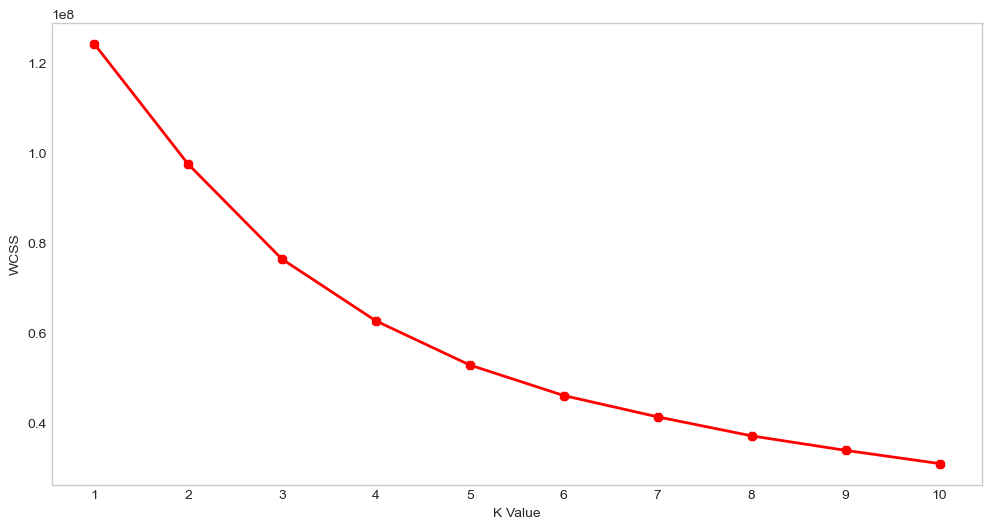

In [130]:
# Check elbow graph again with encoded data
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(encoded.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

I will stick with 5 clusters.

#### Clustering

In [131]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(encoded)
encoded["label"] = clusters

### 3) Evaluate the result

#### Visualize clustering data

In [132]:
encoded

,0,1,2,label
user_id,,,,
1,5.943374,4.407281,-1.318931,0
2,36.857383,37.677724,8.096282,3
3,21.907428,3.847017,-10.174675,0
4,1.911268,1.241777,-0.844316,0
5,9.906379,-0.859107,1.448649,0
...,...,...,...,...
206205,5.691563,3.246052,2.217840,0
206206,26.508920,1.932852,7.236908,0
206207,39.077295,8.984107,8.792154,3


In [134]:
encoded.columns

Index([0, 1, 2, 'label'], dtype='object')

As we have too many data points, I will just sample 10% of the data to visualize the clusters.

In [142]:
sample = encoded.sample(n=20620)

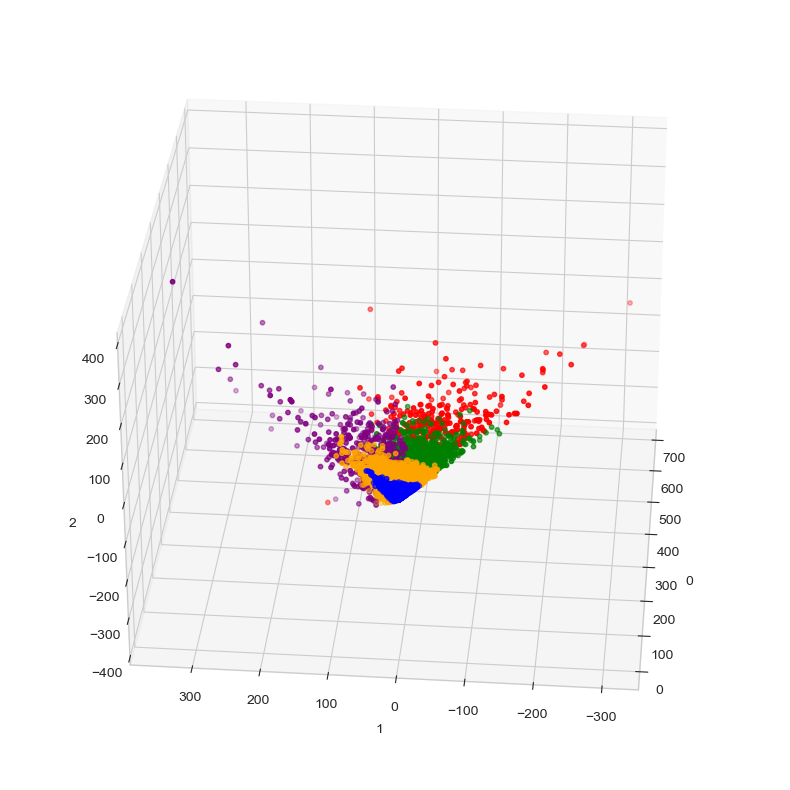

In [143]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample[0][sample.label == 0], sample[1][sample.label == 0], sample[2][sample.label == 0], c='blue', s=10)
ax.scatter(sample[0][sample.label == 1], sample[1][sample.label == 1], sample[2][sample.label == 1], c='red', s=10)
ax.scatter(sample[0][sample.label == 2], sample[1][sample.label == 2], sample[2][sample.label == 2], c='green', s=10)
ax.scatter(sample[0][sample.label == 3], sample[1][sample.label == 3], sample[2][sample.label == 3], c='orange', s=10)
ax.scatter(sample[0][sample.label == 4], sample[1][sample.label == 4], sample[2][sample.label == 4], c='purple', s=10)
ax.view_init(30, 185)
plt.xlabel("0")
plt.ylabel("1")
ax.set_zlabel('2')
plt.show()

#### Calculate the silhouette score

To check how the clusters are well clustered, calculate the goodness of a clustering technique with silhouette coefficient. [-1, 1] 1 means clusters are well apart from each other and clearly distinguished. 

In [148]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

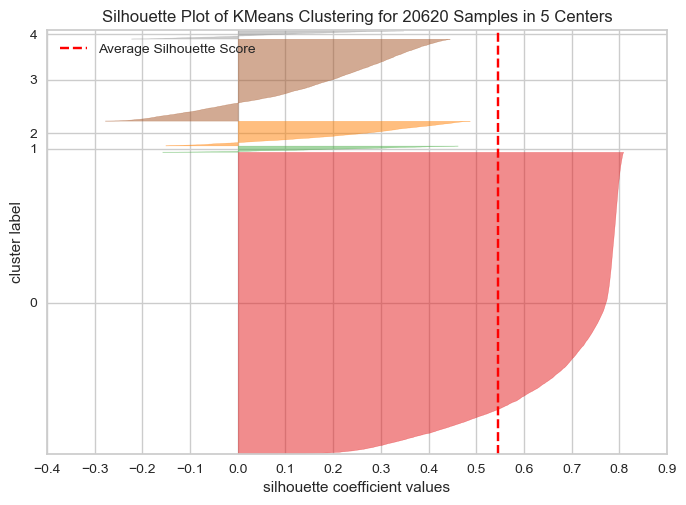

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20620 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [161]:
sil_visualizer = SilhouetteVisualizer(km)
sil_visualizer.fit(sample.loc[:,:2])    
sil_visualizer.show()

Based on the visualized silhouette score, I found that most of the data points clustered to label 0. The average silhouette score is around 0.54. Based on this, it might need some further analysis on customer segmentation to come up with better clusters even though the current analysis was still meaningful.

# summary

The project was divided into two different subjects: 1) Basket analysis and 2) Customer segmentation. 

For the basket analysis, as there were too many data points and the numbers of orders made by the hour of the day were quite different, data were categorized into 3 groups based on the hour of the day that the order was made. With the Apriori algorithm, I got nearly 400 item sets that support is bigger than 0.005(0.5%) per category. With getting itemsets that are above the specific threshold lift that I set, I found a few interesting combinations of items from the frequent item sets. They might be highly dependent on each other. Example of these item sets is milk and vitamin D.


There are a total of 206209 users in the data. What if I am a member of Instacart marketing team and need to plan out the marketing campaigns that will be beneficial to increase the sales from these customers? First of all, I need to have some information about the customers in a few different groups that are sharing similar characteristics in the group. To decide the number of clusters, I used the within-cluster sum of square metric and plot this in an elbow graph. This shows that 5 clusters might be useful to cluster these customers into groups. Next, I decided to use the number of orders that each customer made from each aisle as there are 134 aisles in the data instead of millions of unique products. However, even though the number of potential features reduced a lot from millions to about a hundred, it might be still a lot to throw them into a clustering algorithm. Therefore, I reduced 134 features into 3 with the  SVD algorithm. With this, I successfully clustered all 206209 customers into 5 different groups. As the silhouette score still has some gaps to improve, further analysis on this matter might be a good idea. I suggest trying different features like department instead of the aisle as it got smaller numbers of unique values. Or it would be a great idea that works with more customer behavior-related data like the average number of days from the previous order.